# Model 1

XGB Boost Model

In [258]:
! pip install -r requirements.txt

In [259]:
#
# basics
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_palette('magma')
from sklearn.model_selection import train_test_split


# warnings
import warnings
warnings.filterwarnings('ignore')

RSEED = 42

# EDA

In [260]:
# load training data
df = pd.read_csv('data/Train.csv')

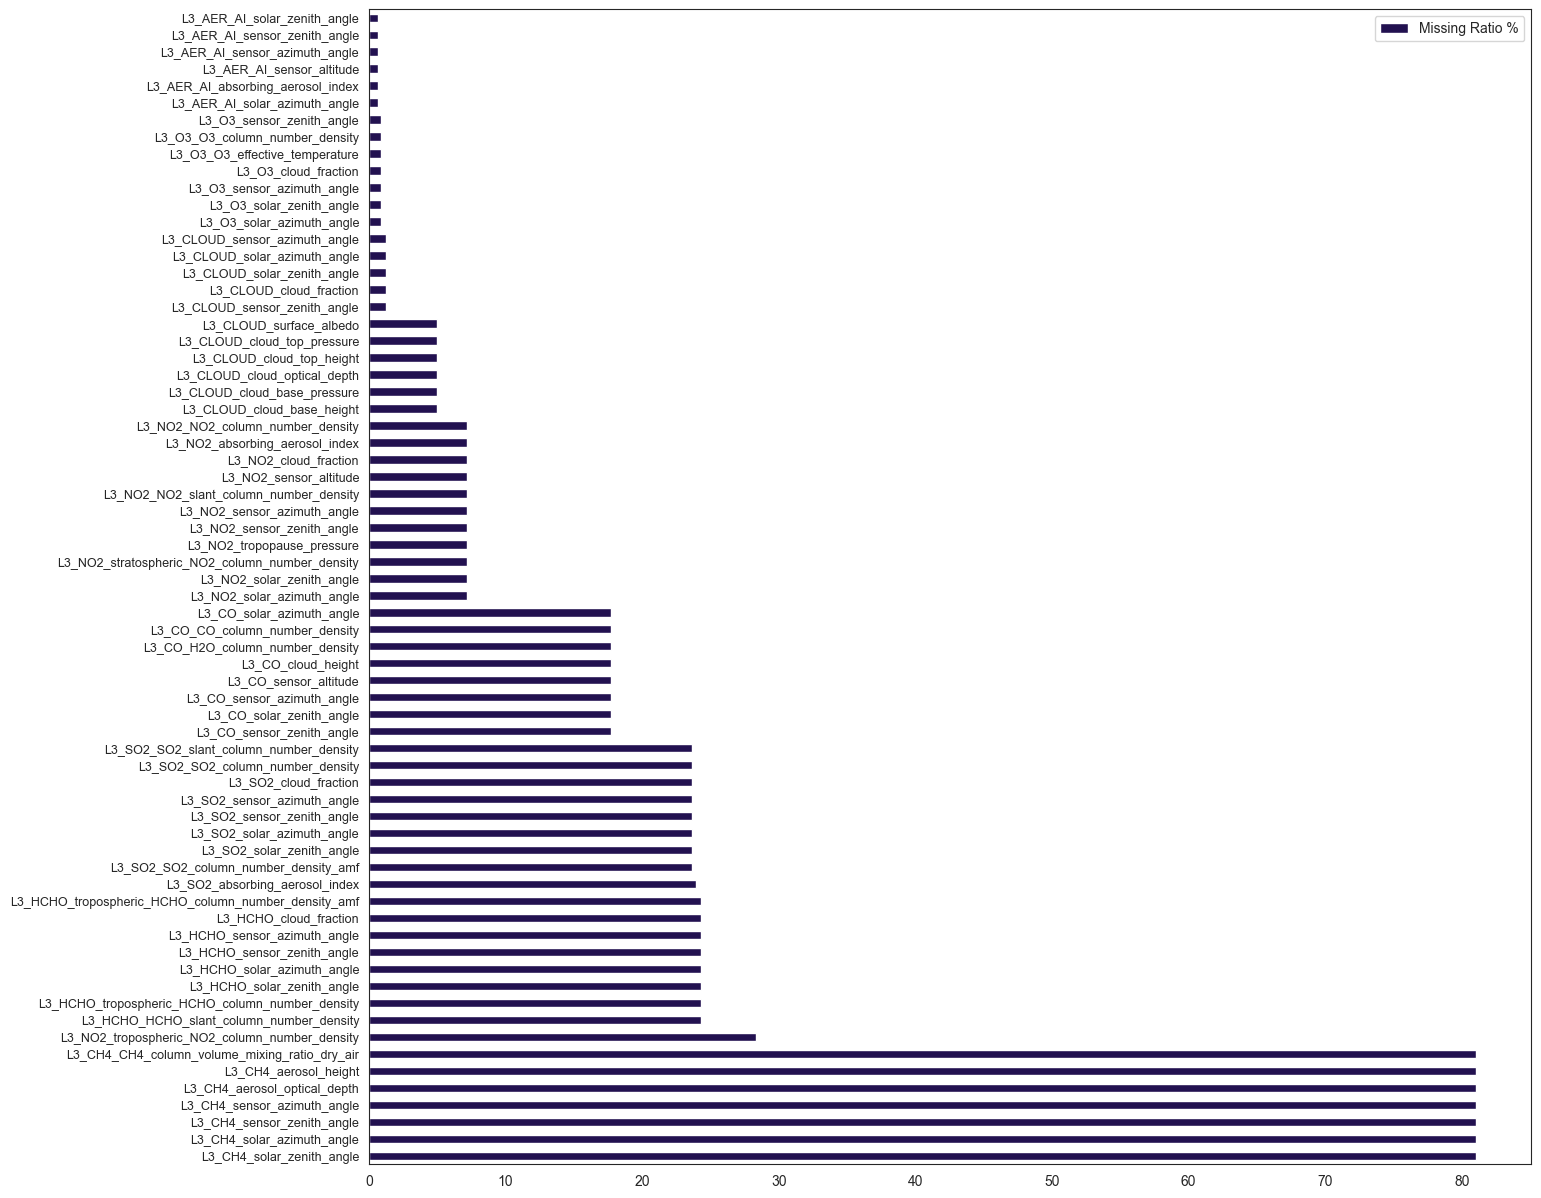

In [261]:
import matplotlib.pyplot as plt
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)
plot_width, plot_height = (15,15)
plt.rcParams['figure.figsize'] = (plot_width,plot_height)
plt.rcParams['ytick.labelsize'] = 9

In [262]:
# drop columns with more than 50% missing values
check_ch4 = [col for col in df.columns if 'CH4' in col]
df.drop(columns=check_ch4, axis=1, inplace=True)

In [263]:
df.drop(columns= ['Place_ID', 'Place_ID X Date'], axis=1, inplace=True)

In [264]:
df.shape

(30557, 73)

In [265]:
# Convert to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Create integer column for weekends
df["IsWeek"] = (df["Date"].dt.weekday < 5).astype(int)

In [266]:
df.drop(columns=['Date', 'target_min', 'target_max', 'target_variance', 'target_count'], axis=1, inplace=True)

In [267]:
df.head(5)

target  precipitable_water_entire_atmosphere   
0    38.0                             11.000000  \
1    39.0                             14.600000   
2    24.0                             16.400000   
3    49.0                              6.911948   
4    21.0                             13.900001   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
0                          60.200001                            0.00804  \
1                          48.799999                            0.00839   
2                          33.400002                            0.00750   
3                          21.300001                            0.00391   
4                          44.700001                            0.00535   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground   
0                    18.516840                              1.996377  \
1                    22.546533                              3.330430   
2                    27.031030                              5.065727   
3                    23.971857                              3.004001   
4                    16.816309                              2.621787   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density   
0                             -1.227395                          0.000074  \
1                             -1.188108                          0.000076   
2                              3.500559                          0.000067   
3                              1.099468                          0.000083   
4                              2.670559                          0.000070   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index   
0                                0.000156                       -1.231330  \
1                                0.000197                       -1.082553   
2                                0.000170                       -1.001242   
3                                0.000175                       -0.777019   
4                                0.000142                        0.366323   

   ...  L3_SO2_SO2_column_number_density   
0  ...                         -0.000127  \
1  ...                          0.000150   
2  ...                          0.000150   
3  ...                          0.000227   
4  ...                          0.000390   

   L3_SO2_SO2_column_number_density_amf   
0                              0.312521  \
1                              0.433957   
2                              0.356925   
3                              0.584522   
4                              0.408047   

   L3_SO2_SO2_slant_column_number_density  L3_SO2_absorbing_aerosol_index   
0                               -0.000040                       -1.861476  \
1                                0.000050                       -1.452612   
2                                0.000053                       -1.572950   
3                                0.000110                       -1.239317   
4                                0.000159                        0.202489   

   L3_SO2_cloud_fraction  L3_SO2_sensor_azimuth_angle   
0               0.000000                    76.536426  \
1               0.059433                   -14.708036   
2               0.082063                  -105.201338   
3               0.121261                  -104.334066   
4               0.037919                    58.850179   

   L3_SO2_sensor_zenith_angle  L3_SO2_solar_azimuth_angle   
0                   38.593017                  -61.752587  \
1                   59.624912                  -67.693509   
2                   49.839714                  -78.342701   
3                   29.181258                  -73.896588   
4                    0.797294                  -68.612480   

   L3_SO2_solar_zenith_angle  IsWeek  
0                  22.363665       1  
1                  28.614804       1  
2                  34.296977       0  
3                  30.545446     

In [268]:
! pip install missingno
import missingno as msno

<Axes: >

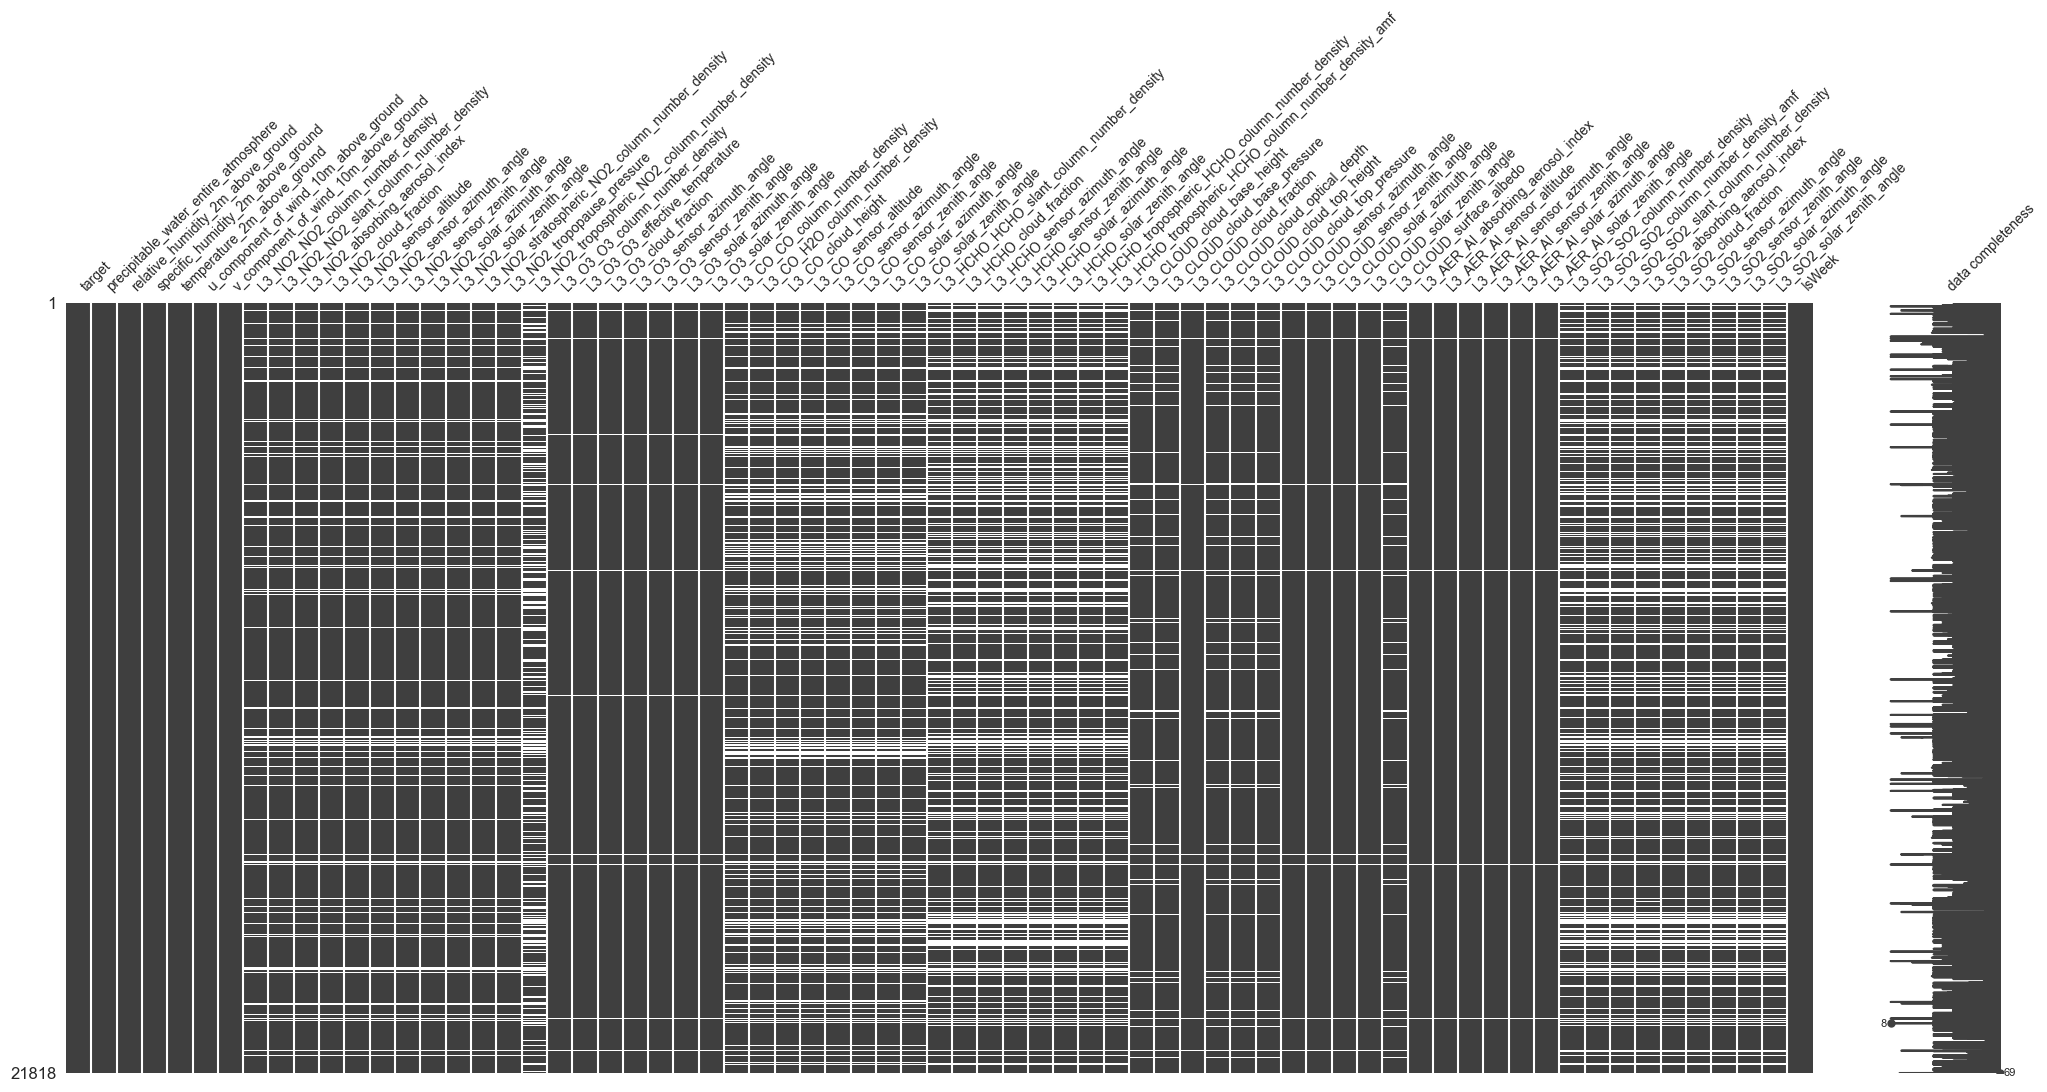

In [269]:
msno.matrix(df.query('IsWeek == 1'), fontsize=10,labels=True)

<Axes: >

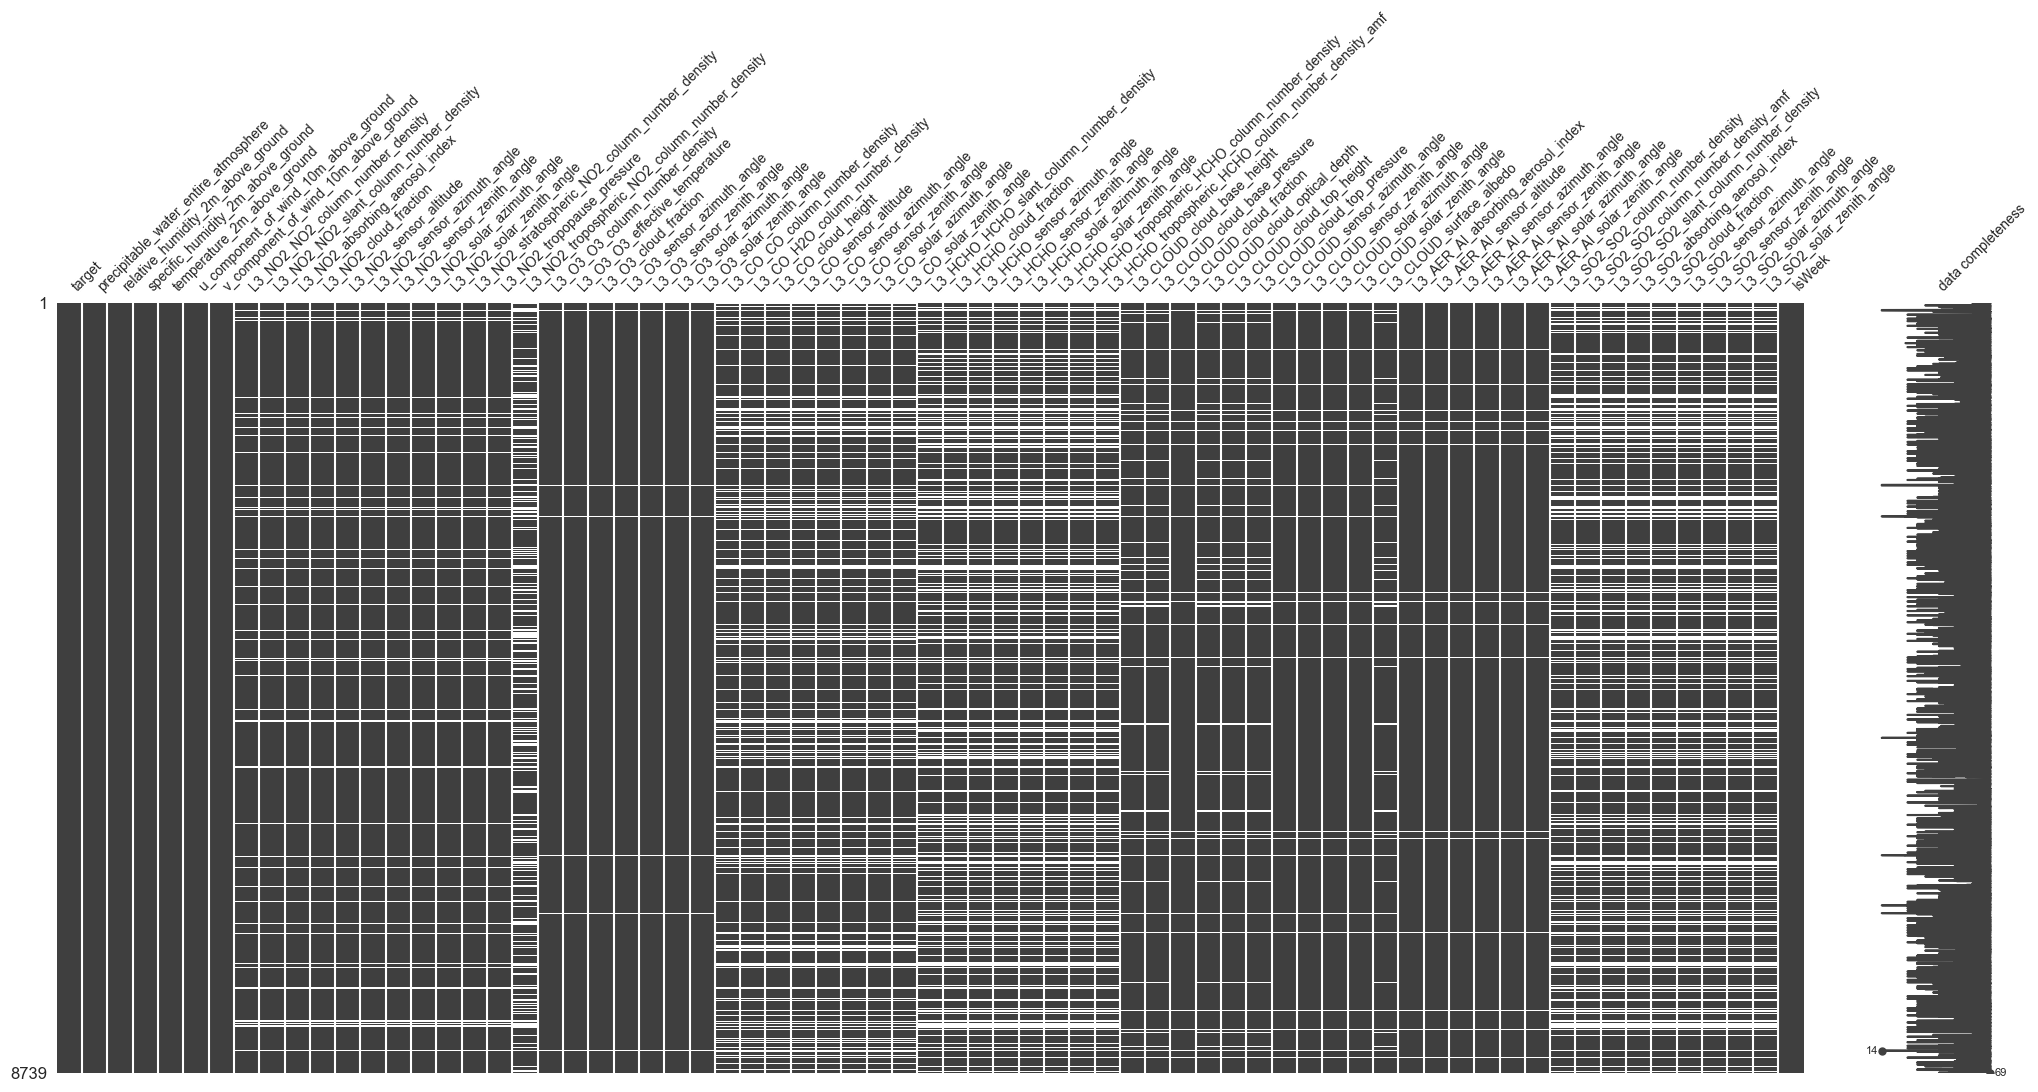

In [270]:
msno.matrix(df.query('IsWeek == 0'), fontsize=10,labels=True)

In [271]:
variables_list = [
    "L3_NO2_NO2_column_number_density",
    "L3_NO2_NO2_slant_column_number_density",
    "L3_NO2_sensor_altitude",
    "L3_NO2_tropopause_pressure",
    "L3_NO2_solar_zenith_angle",
    "L3_SO2_SO2_column_number_density",
    "L3_SO2_SO2_column_number_density_amf",
    "L3_SO2_SO2_slant_column_number_density",
    "L3_SO2_solar_zenith_angle",
    "L3_O3_O3_column_number_density",
    "L3_O3_O3_effective_temperature",
    "L3_O3_solar_zenith_angle",
    "L3_CO_CO_column_number_density",
    "L3_CO_sensor_altitude",
    "L3_CO_solar_zenith_angle",
    "L3_HCHO_solar_zenith_angle",
    "L3_HCHO_tropospheric_HCHO_column_number_density_amf"
]

In [272]:
df[variables_list].replace(0, np.nan, inplace=True)

<Axes: >

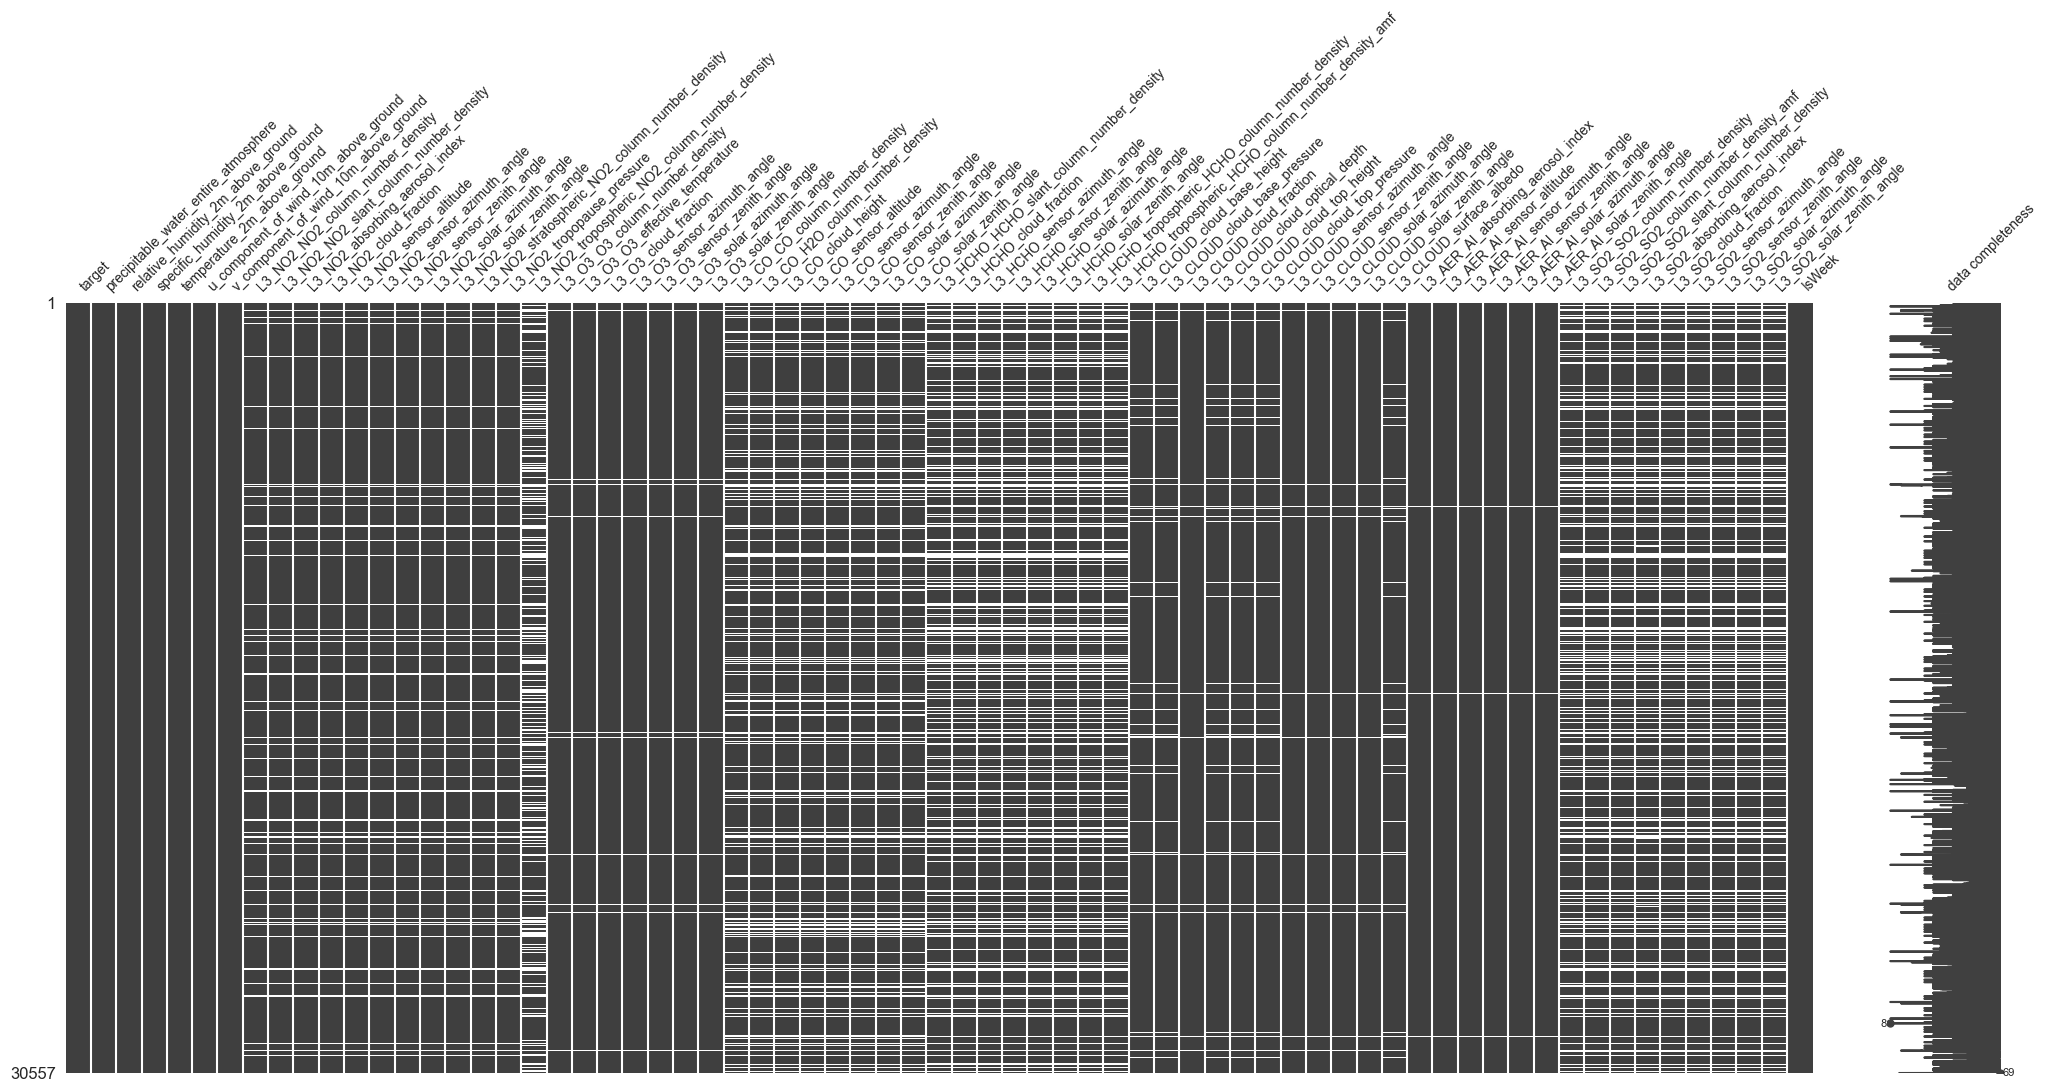

In [273]:
msno.matrix(df, fontsize=10,labels=True)

In [274]:
df.head()

target  precipitable_water_entire_atmosphere   
0    38.0                             11.000000  \
1    39.0                             14.600000   
2    24.0                             16.400000   
3    49.0                              6.911948   
4    21.0                             13.900001   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
0                          60.200001                            0.00804  \
1                          48.799999                            0.00839   
2                          33.400002                            0.00750   
3                          21.300001                            0.00391   
4                          44.700001                            0.00535   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground   
0                    18.516840                              1.996377  \
1                    22.546533                              3.330430   
2                    27.031030                              5.065727   
3                    23.971857                              3.004001   
4                    16.816309                              2.621787   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density   
0                             -1.227395                          0.000074  \
1                             -1.188108                          0.000076   
2                              3.500559                          0.000067   
3                              1.099468                          0.000083   
4                              2.670559                          0.000070   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index   
0                                0.000156                       -1.231330  \
1                                0.000197                       -1.082553   
2                                0.000170                       -1.001242   
3                                0.000175                       -0.777019   
4                                0.000142                        0.366323   

   ...  L3_SO2_SO2_column_number_density   
0  ...                         -0.000127  \
1  ...                          0.000150   
2  ...                          0.000150   
3  ...                          0.000227   
4  ...                          0.000390   

   L3_SO2_SO2_column_number_density_amf   
0                              0.312521  \
1                              0.433957   
2                              0.356925   
3                              0.584522   
4                              0.408047   

   L3_SO2_SO2_slant_column_number_density  L3_SO2_absorbing_aerosol_index   
0                               -0.000040                       -1.861476  \
1                                0.000050                       -1.452612   
2                                0.000053                       -1.572950   
3                                0.000110                       -1.239317   
4                                0.000159                        0.202489   

   L3_SO2_cloud_fraction  L3_SO2_sensor_azimuth_angle   
0               0.000000                    76.536426  \
1               0.059433                   -14.708036   
2               0.082063                  -105.201338   
3               0.121261                  -104.334066   
4               0.037919                    58.850179   

   L3_SO2_sensor_zenith_angle  L3_SO2_solar_azimuth_angle   
0                   38.593017                  -61.752587  \
1                   59.624912                  -67.693509   
2                   49.839714                  -78.342701   
3                   29.181258                  -73.896588   
4                    0.797294                  -68.612480   

   L3_SO2_solar_zenith_angle  IsWeek  
0                  22.363665       1  
1                  28.614804       1  
2                  34.296977       0  
3                  30.545446     

In [275]:
from xgboost import XGBRegressor

In [276]:
df.describe()

target  precipitable_water_entire_atmosphere   
count  30557.000000                          30557.000000  \
mean      61.148045                             15.302326   
std       46.861309                             10.688573   
min        1.000000                              0.420044   
25%       25.000000                              7.666667   
50%       50.000000                             12.200000   
75%       80.000000                             19.900000   
max      815.000000                             72.599998   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground   
count                       30557.000000                       30557.000000  \
mean                           70.552747                           0.006004   
std                            18.807884                           0.003787   
min                             5.128572                           0.000139   
25%                            58.600002                           0.003403   
50%                            74.099998                           0.004912   
75%                            85.450001                           0.007562   
max                           100.000000                           0.021615   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground   
count                 30557.000000                          30557.000000  \
mean                      9.321342                              0.416886   
std                       9.343226                              2.707990   
min                     -34.647879                            -15.559646   
25%                       3.123071                             -1.097864   
50%                       8.478424                              0.222092   
75%                      16.201563                              1.772925   
max                      37.437921                             17.955124   

       v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density   
count                          30557.000000                      28368.000000  \
mean                               0.088486                          0.000094   
std                                2.641924                          0.000094   
min                              -15.023647                         -0.000051   
25%                               -1.415701                          0.000056   
50%                                0.012847                          0.000075   
75%                                1.555559                          0.000111   
max                               15.055530                          0.002998   

       L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index   
count                            28368.000000                    28368.000000  \
mean                                 0.000163                       -1.093982   
std                                  0.000109                        0.610955   
min                                  0.000000                       -3.941742   
25%                                  0.000122                       -1.514681   
50%                                  0.000150                       -1.168333   
75%                                  0.000189                       -0.743363   
max                                  0.002431                        4.824802   

       ...  L3_SO2_SO2_column_number_density   
count  ...                      23320.000000  \
mean   ...                          0.000113   
std    ...                          0.000899   
min    ...                         -0.038756   
25%    ...                         -0.000107   
50%    ...                          0.000056   
75%    ...                          0.000280   
max    ...                          0.026994   

       L3_SO2_SO2_column_number_density_amf   
count                          23320.000000  \
mean                               0.429221   
std                             

In [277]:
X = df.drop("target", axis=1)
y = df.target

In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RSEED)

In [279]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24445, 68), (6112, 68), (24445,), (6112,))

In [280]:
features = list(df.columns)

In [281]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb

num_pipeline = Pipeline([
    ('imputer_num', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, features),
])

pipe_xgbreg = Pipeline([
    ('preprocessor', preprocessor),
    ('xgbreg', xgb.XGBRegressor())  # only parameter that is fixed for everything, not hyperparameter to try later
])



In [282]:
pipe_xgbreg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['target',
                                                   'precipitable_water_entire_atmosphere',
                                                   'relative_humidity_2m_above_ground',
                                                   'specific_humidity_2m_above_ground',
                                                   'temperature_2m_above_ground',
                                                   'u_component_of_wind_10m_abov...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [283]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((24445,), (6112,), (24445, 68), (6112, 68))

In [284]:
from sklearn.model_selection import cross_val_predict

xgb.cv(
    params=pipe_xgbreg.get_params()['xgbreg'].get_xgb_params(),
    dtrain=xgb.DMatrix(X_train, y_train),
    num_boost_round=100,
    nfold=5,
    metrics='mape',
    seed=RSEED
)

#y_train_predicted = cross_val_predict(pipe_xgbreg, X_train, y_train, cv=5) 
#y_test_predicted = cross_val_predict(pipe_xgbreg, X_test, y_test, cv=5) 

train-mape-mean  train-mape-std  test-mape-mean  test-mape-std
0          0.629533        0.001011        0.630455       0.004164
1          0.528374        0.001686        0.535192       0.008325
2          0.529057        0.004099        0.542584       0.014385
3          0.554329        0.005215        0.575238       0.018307
4          0.577529        0.005143        0.606627       0.022378
..              ...             ...             ...            ...
95         0.387163        0.003042        0.609719       0.021412
96         0.386056        0.002849        0.609505       0.021337
97         0.384435        0.002545        0.609268       0.021225
98         0.382075        0.002630        0.609450       0.021705
99         0.380697        0.002634        0.609062       0.021360

[100 rows x 4 columns]

In [285]:
#y_train = pd.DataFrame(y_train)  

In [286]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((24445,), (6112,), (24445, 68), (6112, 68))

In [299]:
param_xgbreg = {'xgbreg__n_estimators': [10, 100, 200, 500, 1000],
         'xgbreg__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.5], 
         'xgbreg__max_depth': [3, 5, 7, 50],
         'xgbreg__min_child_weight': [1, 3, 5],
        'xgbreg__subsample': [0.6, 0.8, 1],
        'xgbreg__colsample_bytree': [0.2, 0.6, 0.8, 1],
        'xgbreg__gamma': [0, 0.1, 0.2, 0.3],
        'xgbreg__scale_pos_weight': [1, 2, 3],
            }


In [291]:
y_train.shape, y_test.shape, X_train.shape, X_test.shape

((24445,), (6112,), (24445, 68), (6112, 68))

In [290]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import make_scorer, mean_absolute_percentage_error
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_xbreg = GridSearchCV(pipe_xgbreg, param_grid=param_xgbreg, cv=5, scoring='accuracy', 
                           verbose=5, n_jobs=-1)

grid_xbreg.fit(X_train, y_train)

Fitting 5 folds for each of 51840 candidates, totalling 259200 fits
[CV 2/5] END xgbreg__colsample_bytree=0.2, xgbreg__gamma=0, xgbreg__learning_rate=0.01, xgbreg__max_depth=3, xgbreg__min_child_weight=1, xgbreg__n_estimators=10, xgbreg__scale_pos_weight=1, xgbreg__subsample=0.6;, score=nan total time=   0.0s
[CV 1/5] END xgbreg__colsample_bytree=0.2, xgbreg__gamma=0, xgbreg__learning_rate=0.01, xgbreg__max_depth=3, xgbreg__min_child_weight=1, xgbreg__n_estimators=10, xgbreg__scale_pos_weight=1, xgbreg__subsample=0.6;, score=nan total time=   0.0s
[CV 5/5] END xgbreg__colsample_bytree=0.2, xgbreg__gamma=0, xgbreg__learning_rate=0.01, xgbreg__max_depth=3, xgbreg__min_child_weight=1, xgbreg__n_estimators=10, xgbreg__scale_pos_weight=1, xgbreg__subsample=0.6;, score=nan total time=   0.0s
[CV 3/5] END xgbreg__colsample_bytree=0.2, xgbreg__gamma=0, xgbreg__learning_rate=0.01, xgbreg__max_depth=3, xgbreg__min_child_weight=1, xgbreg__n_estimators=10, xgbreg__scale_pos_weight=1, xgbreg__subsa

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)

In [298]:

rs = RandomizedSearchCV(
    estimator=pipe_xgbreg,
    param_distributions=param,
    n_iter=100,
    scoring=mape_scorer,
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=RSEED
)

rs.fit(dtrain)
rs.best_score_


TypeError: Singleton array array(<xgboost.core.DMatrix object at 0x129748090>, dtype=object) cannot be considered a valid collection.

In [ ]:
type(X_train), type(y_train)
y_train = pd.DataFrame(y_train)  

target
6892    105.0
28239    38.0
15726    30.0
1413     59.0
30488    55.0
...       ...
29802    58.0
5390     32.0
860     155.0
15795    85.0
23654    10.0

[24445 rows x 1 columns]

In [ ]:
# Defining parameter space for grid-search. Since we want to access the classifier step (called 'logreg') in our pipeline 
# we have to add 'logreg__' in front of the corresponding hyperparameters. 
param_ = {'logreg__penalty':('l1','l2'),
                'logreg__C': [0.001, 0.01, 0.1, 1, 10],
                'logreg__solver': ['liblinear', 'lbfgs', 'sag']
               }

grid_logreg = GridSearchCV(pipe_logreg, param_grid=param_logreg, cv=5, scoring='accuracy', 
                           verbose=5, n_jobs=-1)

NameError: name 'GridSearchCV' is not defined